In [32]:
import nltk
import networkx as nx
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Download the NLTK stopwords and punkt tokenizer if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
input_text = """
      this is the first text. and this is the second text.
      the second text is longer than the first.
      the first text is a small text.
"""

# Split the text into sentences
sentences = sent_tokenize(input_text)
print(sentences)

# Create a graph
G = nx.Graph()

# Calculate TF-IDF vectors for the sentences
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Calculate cosine similarity between sentence vectors
similarity_matrix = cosine_similarity(tfidf_matrix)

# Define a similarity threshold
similarity_threshold = 0.4

# Add nodes and edges to the graph based on similarity threshold
for i in range(len(sentences)):
    G.add_node(i, sentence=sentences[i])
    for j in range(i + 1, len(sentences)):
        print(f"similarity between node {sentences[i]} and node {sentences[j]} = {similarity_matrix[i][j]}\n")
        if similarity_matrix[i][j] > similarity_threshold:
            G.add_edge(i, j, weight=similarity_matrix[i][j])

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

['\n      this is the first text.', 'and this is the second text.', 'the second text is longer than the first.', 'the first text is a small text.']
similarity between node 
      this is the first text. and node and this is the second text. = 0.551939416352363

similarity between node 
      this is the first text. and node the second text is longer than the first. = 0.3791916749655464

similarity between node 
      this is the first text. and node the first text is a small text. = 0.7220560017292983

similarity between node and this is the second text. and node the second text is longer than the first. = 0.6870168423040602

similarity between node and this is the second text. and node the first text is a small text. = 0.3985311681681897

similarity between node the second text is longer than the first. and node the first text is a small text. = 0.27379762471465807

Nodes: 4
Edges: 3


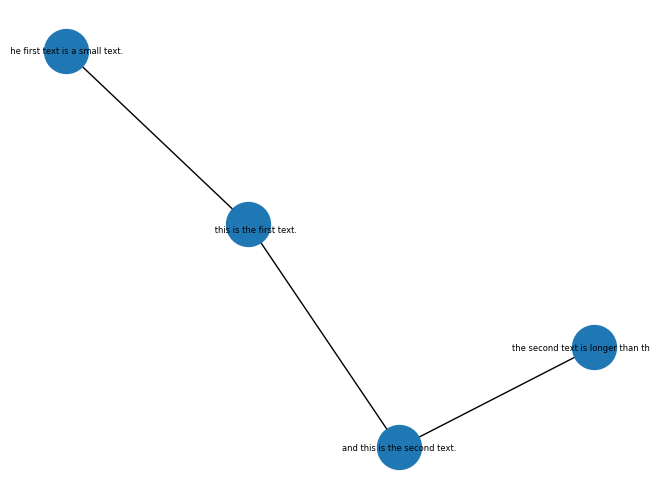

In [41]:
# Draw the graph
pos = nx.spring_layout(G)  # Positioning algorithm (you can choose other algorithms)
labels = {i: G.nodes[i]['sentence'] for i in G.nodes}
nx.draw(G, pos, labels=labels, with_labels=True, node_size=1000, font_size=6)

# Show the graph visualization
plt.show()